In [1]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
iris = datasets.load_iris()
x = iris.data[:,0:2]
y = iris.target

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [66]:
clf = svm.SVC(C = 1, gamma = 0.6)
clf.fit(x_train, y_train)
#higher c = trying more to avoid errors
#so, higher c will lead to overfitting and 
#lower c would lead to underfitting
#so we need to find an optimal value of c
#class_weight = if you want to give bias
#towards a particular class
#coef is used in case of polynomial kernel
#gamma = 1/(2*sigma**2)
#default kernel is rbf
#SVC actually implements 1 vs 1 scheme and does not
#leave an option to use one vs rest
#We can also use LinearSVC which uses linear kernel
#and 1 vs rest scheme

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
clf.score(x_test, y_test)

0.8421052631578947

In [68]:
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

In [69]:
x1 = np.array([1,3])
x2 = np.array([5,6])
makegrid(x1,x2)

(array([[0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        ...,
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98]]),
 array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
        [4.02, 4.02, 4.02, ..., 4.02, 4.02, 4.02],
        [4.04, 4.04, 4.04, ..., 4.04, 4.04, 4.04],
        ...,
        [6.94, 6.94, 6.94, ..., 6.94, 6.94, 6.94],
        [6.96, 6.96, 6.96, ..., 6.96, 6.96, 6.96],
        [6.98, 6.98, 6.98, ..., 6.98, 6.98, 6.98]]))

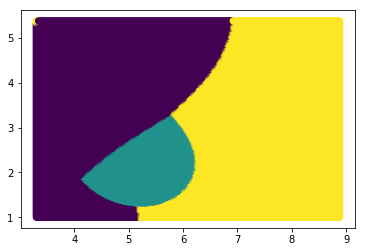

In [70]:
xx, yy = makegrid(x[:,0], x[:,1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

In [71]:
#Choosing parameters using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
grid = {"n_neighbors":[3,5,7,9,11]}
#in case of KNN, it's going to find the best value of K
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
abc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [73]:
abc.cv_results_

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessi

{'mean_fit_time': array([0.01188461, 0.00033077, 0.0003318 , 0.00049575, 0.00033077]),
 'std_fit_time': array([1.68073764e-02, 2.33886911e-04, 2.34624745e-04, 2.97360213e-07,
        2.33886911e-04]),
 'mean_score_time': array([0.00095463, 0.00033077, 0.00066264, 0.        , 0.00016538]),
 'std_score_time': array([0.00064974, 0.00023389, 0.00023546, 0.        , 0.00023389]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.79487179, 0.76923077, 0.79487179, 0.76923077, 0.71794872]),
 'split1_test_score': array([0.78378378, 0.78378378, 0.81081081, 0.83783784, 0.81081081]),
 'split2_test_score': array([0.72222222, 0.72222222, 0.80555556, 0.75      , 0.75      ]),
 'mean_test_score': array([0.76785714, 0.75892857, 0.80357143

In [75]:
clf = svm.SVC()
grid = {"C":[1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
       "gamma":[1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0], 'gamma': [0.001, 0.0005, 0.0001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
abc.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)